In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
import numpy.linalg as la
from astropy.io import ascii
from astropy.table import Table

In [ ]:
def plot_fit(data, cloud, mode, slope, intercept):
  cloudData = data["Cloud"]
  modeData = data["Mode"]
  figure1 = plt.figure(figsize = (10, 5))
  left = figure1.add_subplot(1, 2, 1)
  right = figure1.add_subplot(1, 2, 2)
  if cloud.lower() != "any" and mode.lower() != "any":
    indices = [i for i in range(len(cloudData)) if cloudData[i].lower() == cloud.lower() and modeData[i].lower() == mode.lower()]
  elif cloud.lower() != "any":
    indices = [i for i in range(len(cloudData)) if cloudData[i].lower() == cloud.lower()]
  elif mode.lower() != "any":
    indices = [i for i in range(len(cloudData)) if modeData[i].lower() == mode.lower()]
  else:
    indices = [i for i in range(len(cloudData))]
  logP1 = [data["logP1"][i] for i in indices]
  W = [data["W"][i] for i in indices]
  color = ["Orange" if data["Mode"][i].lower() == "1" else "blue" for i in indices] 
  left.scatter(logP1, W, c = color)
  logP = np.arange(min(data["logP1"]), max(data["logP1"]) + 0.1, 0.1)
  y = slope * logP + intercept
  left.plot(logP, y, c = "black")
  left.set_xlabel("log P")
  left.set_ylabel("W")
  left.set_title("W vs log P")
  res = np.array(W) - slope * np.array(logP1) - intercept
  resid_sign = ["C0" if res[i] > 0 else "C1" for i in range(len(res))]
  RA0 = [data["RA0"][i] for i in indices]
  Decl0_ = [data["Decl0"][i] for i in indices]
  right.scatter(RA0, Decl0_, c = resid_sign, alpha = 0.1)
  right.set_xlabel("RA0")
  right.set_ylabel("Decl0")
  right.set_title("RA0 vs Decl0")
  figure1.suptitle(f"cloud={cloud},mode={mode},slope={round(slope, 3)},intercept={round(slope, 3)}")
  figure1.savefig(f"{cloud}_{mode}.png")
  plt.show()
def do_fit(data, cloud, mode):
  cloudData = data["Cloud"]
  modeData = data["Mode"]
  if cloud.lower() != "any" and mode.lower() != "any":
    indices = [i for i in range(len(cloudData)) if cloudData[i].lower() == cloud.lower() and modeData[i].lower() == mode.lower()]
  elif cloud.lower() != "any":
    indices = [i for i in range(len(cloudData)) if cloudData[i].lower() == cloud.lower()]
  elif mode.lower() != "any":
    indices = [i for i in range(len(cloudData)) if modeData[i].lower() == mode.lower()]
  else:
    indices = [i for i in range(len(cloudData))]
  logP1 = [data["logP1"][i] for i in indices]
  W = [data["W"][i] for i in indices]
  slope, intercept = np.polyfit(logP1, W, 1)
  np.set_printoptions(precision = 3)
  print(round(slope, 3), round(intercept, 3))
  plot_fit(data, cloud, mode, slope, intercept)
def __main__():
  filepath = "/content/Cepheids.csv"
  data = ascii.read(filepath)  
  boolean = True
  while(boolean):
    cloudInput = input()
    if cloudInput.lower() == "exit":
      boolean = False
      break
    modeInput = input()
    if modeInput.lower() == "exit":
      boolean = False
      continue
    if cloudInput.lower() != "any" and cloudInput.lower() != "lmc" and cloudInput.lower() != "smc" and cloudInput.lower() != "exit":
      raise ValueError()
    if modeInput.lower() != "any" and modeInput.lower() != "f" and modeInput.lower() != "1" and modeInput.lower() != "exit":
      raise ValueError()
    do_fit(data, cloudInput, modeInput)
__main__()

exit


-3.326 15.893


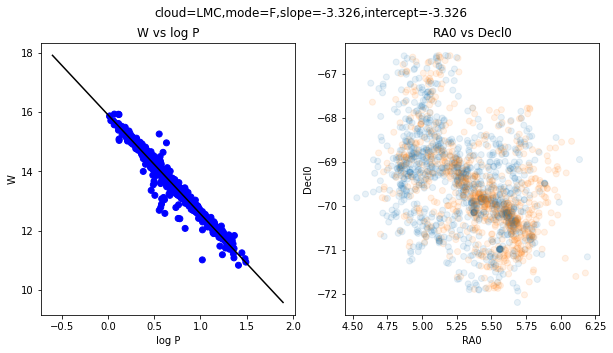

-3.432 15.384


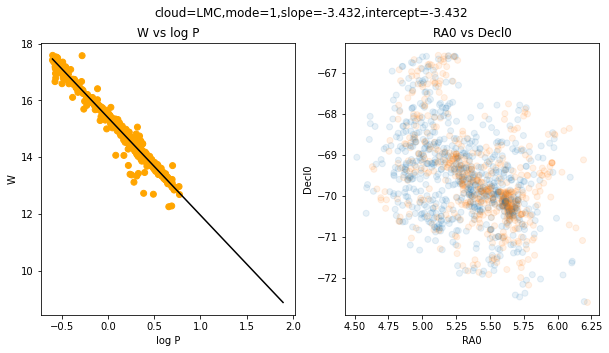

-3.454 16.48


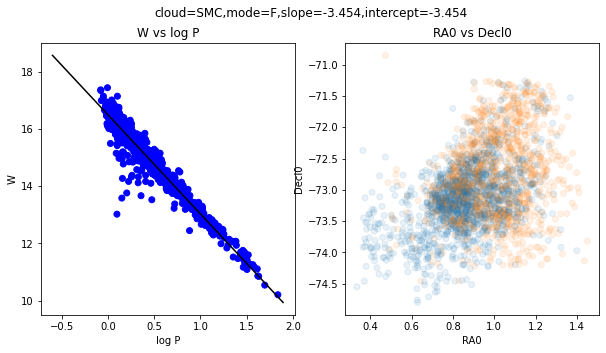

-3.615 15.962


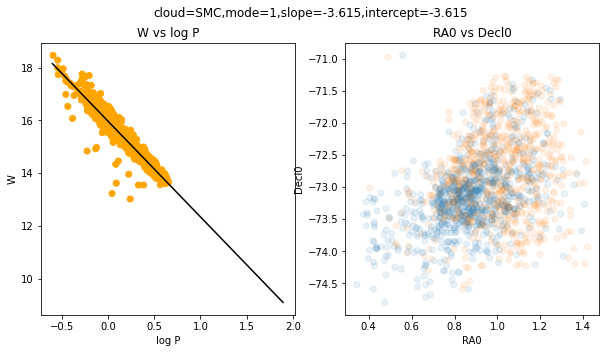

In [ ]:
filepath = "/content/Cepheids.csv"
data = ascii.read(filepath) 
for cloudStr in ["LMC", "SMC"]:
  for modeStr in ["F", "1"]:
    do_fit(data, cloudStr, modeStr)

-2.832 15.449


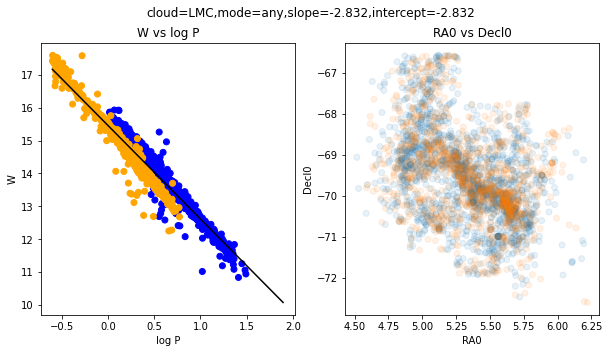

-3.1 16.173


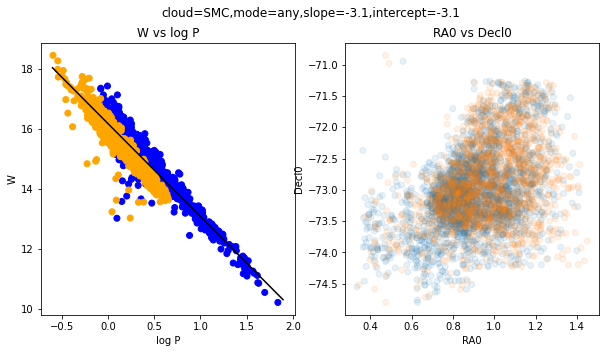

In [ ]:
do_fit(data, "LMC", "any")
do_fit(data, "SMC", "any")